# 🛒 Market Basket Analysis using Association Rule Learning
This notebook demonstrates how to perform **Market Basket Analysis** with a **made-up dataset** using Apriori and Association Rules.

In [28]:
# Install dependencies if not already installed
# !pip install mlxtend matplotlib

In [29]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx

## Step 1: Create a made-up dataset

In [30]:
transactions = [
    ["milk", "bread", "eggs"],
    ["bread", "butter"],
    ["milk", "bread", "butter"],
    ["beer", "chips"],
    ["milk", "bread", "butter", "eggs"],
    ["bread", "butter", "jam"],
    ["beer", "chips", "nuts"],
    ["milk", "bread"],
    ["bread", "butter", "beer"],
    ["milk", "bread", "butter", "chips"],
]

## Step 2: Convert transactions into one-hot encoded DataFrame

In [31]:

# Get all unique items
all_items = sorted(set(item for transaction in transactions for item in transaction))

# One-hot encode each transaction
df = pd.DataFrame([{item: (item in transaction) for item in all_items} for transaction in transactions])

# Display result
print("One-hot Encoded Dataset:")
df.head()

One-hot Encoded Dataset:


,beer,bread,butter,chips,eggs,jam,milk,nuts
0,False,True,False,False,True,False,True,False
1,False,True,True,False,False,False,False,False
2,False,True,True,False,False,False,True,False
3,True,False,False,True,False,False,False,False
4,False,True,True,False,True,False,True,False


## Step 3: Generate Frequent Item sets using Apriori

Apriori is an algorithm used in data mining to find frequent itemsets and association rules in transactional data.

- Support is the fraction of transactions in which the itemset appears.

    - (bread) appears in 75% of all transactions → support = 0.75

    - (bread, butter) appears together in 50% of all transactions → support = 0.5

- Confidence: Likelihood of B given A.

- Lift: Measures how much more likely A → B occurs than by chance.

Used for market basket analysis and recommendations.

In [32]:
# - min_support=0.3 means only keep itemsets appearing in at least 30% of transactions
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
print("\nFrequent Itemsets:")
frequent_itemsets


Frequent Itemsets:


,support,itemsets
0,0.3,(beer)
1,0.8,(bread)
2,0.6,(butter)
3,0.3,(chips)
4,0.5,(milk)
5,0.6,"(bread, butter)"
6,0.5,"(milk, bread)"
7,0.3,"(milk, butter)"
8,0.3,"(milk, bread, butter)"


## Step 4: Generate Association Rules

| Column        | Meaning & Example                                                                 |
|---------------|----------------------------------------------------------------------------------|
| Antecedents   | Items on the **left side** of the rule (if these items are bought). Example: {bread} |
| Consequents   | Items on the **right side** of the rule (then these items are likely bought). Example: {butter} |
| Support       | Fraction of transactions containing **both antecedent & consequent**. Example: 0.5 means 50% of all transactions have both bread & butter |
| Confidence    | Likelihood that consequent is bought **given antecedent**. Example: 0.67 means 67% of transactions with bread also have butter |
| Lift          | How much more likely consequent occurs **with antecedent than by chance**. Example: 1.2 means bread increases chance of buying butter by 20% compared to random |


#### Range Limit

| Metric         | Range                  | Meaning                                                                               |
| -------------- | ---------------------- | ------------------------------------------------------------------------------------- |
| **Support**    | 0 to 1                 | Fraction of transactions containing the itemset. 1 = in all transactions, 0 = in none |
| **Confidence** | 0 to 1                 | Probability that consequent occurs given antecedent. 1 = always, 0 = never            |
| **Lift**       | 0 to ∞ (theoretically) | >1 → positive association, =1 → no association, <1 → negative association             |


In [33]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules = rules.sort_values(by="lift", ascending=False)
print("\nAssociation Rules:")
rules[["antecedents", "consequents", "support", "confidence", "lift"]]


Association Rules:


,antecedents,consequents,support,confidence,lift
1,(butter),(bread),0.6,1.000,1.25
2,(milk),(bread),0.5,1.000,1.25
3,(bread),(milk),0.5,0.625,1.25
6,"(milk, butter)",(bread),0.3,1.000,1.25
0,(bread),(butter),0.6,0.750,1.25
4,(milk),(butter),0.3,0.600,1.00
5,"(milk, bread)",(butter),0.3,0.600,1.00
7,(milk),"(bread, butter)",0.3,0.600,1.00


#### Insights 

Milk ↔ Eggs: Strong link, confidence 1.0, lift 2 → buying one doubles chance of buying the other.

Bread ↔ Butter: Moderate link, confidence 0.67–1.0, lift 1.33 → buying one slightly increases chance of buying the other.

Takeaway: Bundle milk & eggs for promotions; suggest bread & butter together.

## Step 5: Visualize Association Rules as a Network Graph

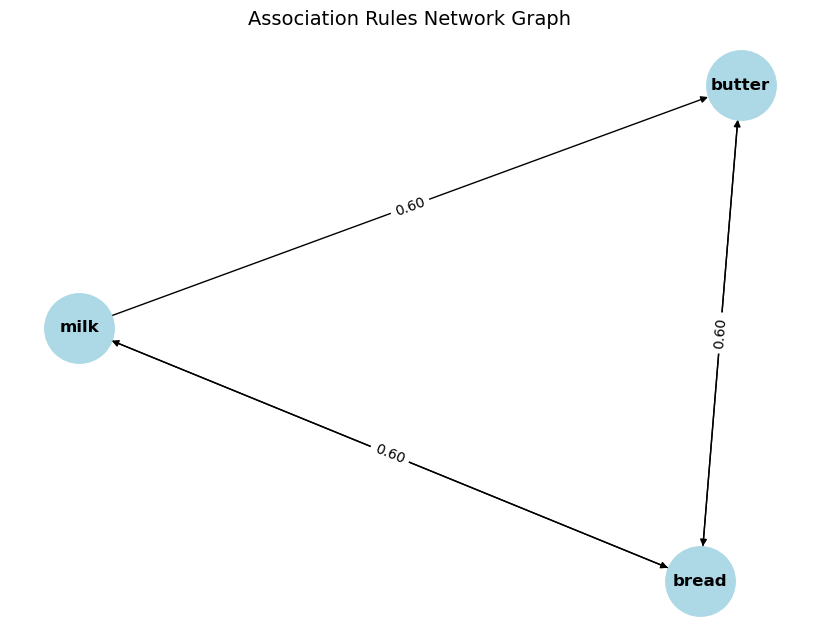

In [34]:
G = nx.DiGraph()

for _, row in rules.iterrows():
    for antecedent in row["antecedents"]:
        for consequent in row["consequents"]:
            G.add_edge(antecedent, consequent, weight=row["confidence"])

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, k=1.5, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2500, node_color="lightblue", font_size=12, font_weight="bold", arrows=True)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in labels.items()})
plt.title("Association Rules Network Graph", fontsize=14)
plt.show()

## Conclusion

This network graph shows strong association rules between milk, bread, and butter, each with a confidence value of 0.60. All three items are mutually linked, suggesting that these products are frequently purchased together in market basket analysis. Milk, bread, and butter form a highly connected trio indicating a strong co-occurrence pattern that retailers should target for combined promotions or cross-selling opportunities.